In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import pandas as pd
import numpy as np
import scipy as sci
from dateutil.parser import parse


# from plotly.graph_objs import *
from bokeh.plotting import figure
from bokeh.io import output_file, show
# from bkcharts import Histogram
# from bkcharts import Scatter
# from bkcharts import Bar
# from bkcharts import BoxPlot

In [13]:
import plotly
plotly.tools.set_credentials_file(username='hjang', api_key='lQzxnluNs8UTgkVF5HpM')
import plotly.plotly as py
import plotly.graph_objs as go
# trace=go.Scatter3D(
#     x=[9,8,5,1], y=[2,4,1,0], z=[12,6,10,13], mode='lines')
# data=[trace]
# py.iplot(data)

pd.set_option('mode.chained_assignment', None)
jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
jan = jan.drop(['taxi_id','pickup_census_tract', 'dropoff_census_tract','tolls','extras','trip_total','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)
jan = jan[(jan['pickup_community_area'].notnull()) & (jan['dropoff_community_area'].notnull())]
jan = jan.fillna(0)
jan = jan.loc[(jan["trip_seconds"] > 0) & (jan["trip_miles"] > 0) & (jan["fare"] > 0) ]
# jan['trip_start_month'] = jan['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%m'))
# jan['trip_start_time'] = jan['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%X')[:-3])
jan = jan.drop('Unnamed: 0', 1)

timely_pickup = pd.DataFrame(jan, columns = ['pickup_community_area','dropoff_community_area', 'fare','trip_seconds'])
top5_areas = timely_pickup[timely_pickup['pickup_community_area'].isin([8.0,32.0,28.0,6.0,7.0])]

# top5_areasJ['trip_start_month'] = top5_areasJ['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%m'))
# top5_areasJ['trip_start_month'] = top5_areasJ['trip_start_timestamp'].loc[:10].apply(lambda x: parse(x).month)
# top5_areasJ['trip_start_time']= top5_areasJ['trip_start_timestamp'].loc[:10].apply(lambda x: parse(x).strftime('%X'))
# jan.info()
# top5_areasJ.head()


# x, y, z = top5_areas['pickup_community_area'].iloc[:1000].value_counts(), top5_areas['dropoff_community_area'].iloc[:1000],top5_areas['fare'].iloc[:1000]
x, y, z = top5_areas['pickup_community_area'].value_counts(), top5_areas['dropoff_community_area'] ,top5_areas['fare']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        line=dict(
            color='rgba(201, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

# x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
# trace2 = go.Scatter3d(
#     x=x2,
#     y=y2,
#     z=z2,
#     mode='markers',
#     marker=dict(
#         color='rgb(127, 127, 127)',
#         size=6,
#         symbol='circle',
#         line=dict(
#             color='rgb(204, 204, 204)',
#             width=1
#         ),
#         opacity=0.9
#     )
# )
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


/Users/heesukjang/miniconda3/lib/python3.6/site-packages/plotly/plotly/plotly.py:224: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



The draw time for this plot will be slow for all clients.


/Users/heesukjang/miniconda3/lib/python3.6/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [2]:
# BEFORE Cleaning: Read and get the info of the sample dataset of January 
# jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
# # jan.describe()
# jan = jan.drop('Unnamed: 0', 1)
# jan.info()
# jan.head()
# jan.shape

In [19]:
# AFTER Cleaning: Run the sample dataset of january to confirm the correct procedure of cleaning 
pd.set_option('mode.chained_assignment', None)
jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
jan = jan.drop(['taxi_id','pickup_census_tract', 'dropoff_census_tract','tolls','extras','trip_total','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)
jan = jan[(jan['pickup_community_area'].notnull()) & (jan['dropoff_community_area'].notnull())]
jan = jan.fillna(0)
jan = jan.loc[(jan["trip_seconds"] > 0) & (jan["trip_miles"] > 0) & (jan["fare"] > 0) ]
# jan['trip_start_month'] = jan['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%m'))
# jan['trip_start_time'] = jan['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%X')[:-3])
jan = jan.drop('Unnamed: 0', 1)

timely_pickupJ = pd.DataFrame(jan, columns = ['pickup_community_area','trip_start_timestamp'])
top5_areasJ = timely_pickupJ[timely_pickupJ['pickup_community_area'].isin([8.0,32.0,28.0,6.0,7.0])]
top5_areasJ.head()

# top5_areas['pickup_community_area'].value_counts()
# top5_areas.groupby(['pickup_community_area','trip_start_month']).size().unstack()

# top5_areasJ['trip_start_month'] = top5_areasJ['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%m'))
# top5_areasJ['trip_start_month'] = top5_areasJ['trip_start_timestamp'].loc[:10].apply(lambda x: parse(x).month)
# top5_areasJ['trip_start_time']= top5_areasJ['trip_start_timestamp'].loc[:10].apply(lambda x: parse(x).strftime('%X'))



,pickup_community_area,trip_start_timestamp
3,8.0,1/13/16 13:30
4,6.0,1/10/16 3:45
5,28.0,1/19/16 8:45
7,28.0,1/29/16 17:45
9,32.0,1/12/16 15:15


In [4]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('mode.chained_assignment', None)
# Read the data from each month in 2016 and save them into monthly dataframe called jan, feb, mar,...
jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
feb = pd.read_csv('chicago_taxi_trips_2016_02.csv')
mar = pd.read_csv('chicago_taxi_trips_2016_03.csv')
apr = pd.read_csv('chicago_taxi_trips_2016_04.csv')
may = pd.read_csv('chicago_taxi_trips_2016_05.csv')
june = pd.read_csv('chicago_taxi_trips_2016_06.csv')
july = pd.read_csv('chicago_taxi_trips_2016_07.csv')
aug = pd.read_csv('chicago_taxi_trips_2016_08.csv')
sept = pd.read_csv('chicago_taxi_trips_2016_09.csv')
octo = pd.read_csv('chicago_taxi_trips_2016_10.csv')
nov = pd.read_csv('chicago_taxi_trips_2016_11.csv')
dec = pd.read_csv('chicago_taxi_trips_2016_12.csv')

# Clean (Remove) the columns and rows that are not applicable, unknown or missing values from each month
cleaned_2016 = pd.DataFrame()
dfYear = []
for mo in jan, feb, mar, apr, may, june, july, aug, sept, octo, nov, dec:
    mo = mo.drop(['taxi_id','pickup_census_tract', 'dropoff_census_tract','extras','tolls','trip_total','company','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude'], axis=1)
    mo = mo[(mo['pickup_community_area'].notnull()) & (mo['dropoff_community_area'].notnull())]
    mo = mo.fillna(0)
    mo = mo.loc[(mo["trip_seconds"] > 0) & (mo["trip_miles"] > 0) & (mo["fare"] > 0) ]
    dfYear.append(mo)

cleaned_2016 = pd.concat(dfYear, axis=0, join='outer', ignore_index=True)
# cleaned_2016 = pd.concat(dfYear, ignore_index=True)
cleaned_2016 = cleaned_2016.drop('Unnamed: 0', 1)

slc = pd.DataFrame(cleaned_2016, columns = ['pickup_community_area','dropoff_community_area','trip_seconds'])

slc.head()

,pickup_community_area,dropoff_community_area,trip_seconds
0,24.0,24.0,180.0
1,8.0,8.0,60.0
2,6.0,24.0,780.0
3,28.0,8.0,720.0
4,56.0,6.0,1560.0


In [5]:
# timely_pickup = pd.DataFrame(cleaned_2016, columns = ['pickup_community_area','trip_start_timestamp'])
# top5_areas = timely_pickup[timely_pickup['pickup_community_area'].isin([8.0,32.0,28.0,6.0,7.0])]

# top5_areas['trip_start_month'] = top5_areas['trip_start_timestamp'].map(lambda x: parse(x).strftime('%m'))
# top5_areas['trip_start_time']= top5_areas['trip_start_timestamp'].map(lambda x: parse(x).strftime('%X'))

          pickup_community_area  dropoff_community_area  trip_seconds
clusters                                                             
0                     18.055538               18.081974    628.670423
1                     70.281192               17.076711   2224.941737
2                     25.872648               70.817690   1851.727044
0    10912640
1     1106301
2      900181
Name: clusters, dtype: int64


Text(25.9673,0.5,'dropoff_community_area')

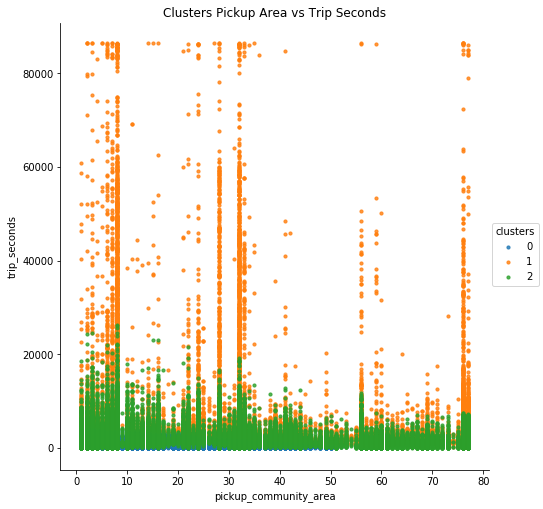

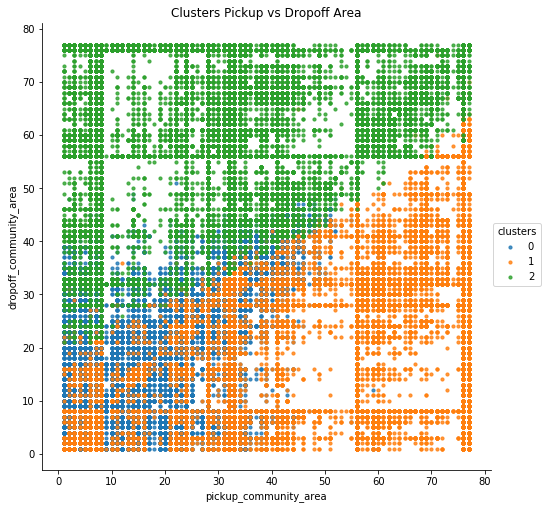

In [85]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


#Make a copy of DF
df_tr = slc

#Standardize
clmns = ['pickup_community_area','dropoff_community_area','trip_seconds']
df_tr_norm = stats.zscore(df_tr[clmns])

#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_norm)
labels = kmeans.labels_

#Glue back to originaal data
df_tr['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print(df_tr[clmns].groupby(['clusters']).mean()) 
print(df_tr[clmns].groupby(['clusters']).count()) 

#Scatter plot of Pickup Area vs Trip Seconds
# timely_pickupJ['pickup_community_area'].value_counts()

sns.lmplot('pickup_community_area','trip_seconds' , 
           data=df_tr, 
           fit_reg=False, 
           size=7,
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 10})
plt.title('Clusters Pickup Area vs Trip Seconds')
plt.xlabel('pickup_community_area')
plt.ylabel('trip_seconds')

#Scatter plot of Pickup vs Dropoff Area
sns.lmplot('pickup_community_area', 'dropoff_community_area', 
           data=df_tr, 
           fit_reg=False, 
           size=7,
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 10})
plt.title('Clusters Pickup vs Dropoff Area')
plt.xlabel('pickup_community_area')
plt.ylabel('dropoff_community_area')

In [3]:
timely_pickup = pd.DataFrame(slc, columns = ['pickup_community_area','dropoff_community_area', 'trip_seconds'])
top5_areas = timely_pickup[timely_pickup['pickup_community_area'].isin([8.0,32.0,28.0,6.0,7.0])]


# x, y, z = top5_areas['pickup_community_area'].iloc[:1000].value_counts(), top5_areas['dropoff_community_area'].iloc[:1000],top5_areas['fare'].iloc[:1000]
x, y, z = top5_areas['pickup_community_area'].value_counts(), top5_areas['dropoff_community_area'] ,top5_areas['trip_seconds']
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        line=dict(
            color='rgba(201, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')


NameError: name 'slc' is not defined

In [ ]:
# Select the two columns from the 'cleaned_2016' dataframes
timely_pickup = pd.DataFrame(cleaned_2016, columns = ['pickup_community_area','trip_start_timestamp'])

# 8: Near North Side, 32: Loop, 28: Near West Side, 6: Lake View, 7: Lincoln Park
top5_areas = timely_pickup[timely_pickup['pickup_community_area'].isin([8.0,32.0,28.0,6.0,7.0])]

top5_areas['trip_start_month'] = top5_areas['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%m'))
# # top5_areas['trip_start_time'] = top5_areas['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%X')[:-3])    # http://strftime.org/   ====> hour:minute
# top5_areas['trip_start_time'] = top5_areas['trip_start_timestamp'].apply(lambda x: parse(x).strftime('%X'))    # http://strftime.org/   ====> hour:minute
# top5_areas.head(20)

# top5_areas['pickup_community_area'].value_counts()
top5_areas.groupby(['pickup_community_area','trip_start_month']).size().unstack()
# top5_areas.shape

In [ ]:
theDate = parse('2016-12-23 14:15:00')
# print(theDate.month)
print(theDate.strftime('%b'))    # extract numeric month as an abbrivated string format month
# print(theDate.day)
# print(theDate.year)
print(theDate.strftime('%X')[:-3])   # http://strftime.org/   ====> hour:minute
# print(theDate.strftime('%x'))        # small letter 'x'

# cleaned_2016['trip_start_month'] = cleaned_2016['trip_start_timestamp'].iloc[:10].apply(lambda x: parse(x).strftime('%b'))

In [ ]:
# parse timestamp and extract month and time => slice the first 10 rows as a sample to run the function.

# cleaned_2016['trip_start_month'] = cleaned_2016['trip_start_timestamp'].isin(['8.0,32.0,28.0,6.0,7.0'])].apply(lambda x: parse(x).strftime('%m'))



In [ ]:
x0 = cleaned_2016['pickup_community_area'].iloc[:100].value_counts()
x1 = cleaned_2016['pickup_community_area'].iloc[:100]

trace1 = go.Histogram(
    x=x0,
    histnorm='Frequency',
    name='freqency of pickup',
    xbins=dict(
        start=0.0,
        end=20.0,
        size=0.5
    ),
    marker=dict(
        color='#338AFF',
    ),
    opacity=0.75
)
# trace2 = go.Histogram(
#     x=x1,
#     name='pickup area code',
#     xbins=dict(
#         start=0.0,
#         end=78,
#         size=0.9
#     ),
#     marker=dict(
#         color='#FF6E33'
#     ),
#     opacity=0.75
# )
data = [trace1]

layout = go.Layout(
    title='Sampled Results',
    xaxis=dict(
        title='Pickup Area Code'
    ),
    yaxis=dict(
        title='Frequency'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

In [6]:
import sklearn
sklearn.__version__

'0.19.1'

In [7]:
zero_count = len([x for x in cleaned_2016['tips'] if x == 0.00])
print('Number of tips with the value of ZEROs: ', zero_count)
percent_of_zero_tips = zero_count / len(cleaned_2016['tips']) * 100
print("Percentage of tips with the value of ZEROs: {:.2f}".format(percent_of_zero_tips),'%')


Number of tips with the value of ZEROs:  7241932
Percentage of tips with the value of ZEROs: 56.06 %


In [8]:
corr_sec_dist = cleaned_2016['trip_seconds'].corr(cleaned_2016['trip_miles'])
print("Correlation Coefficient Between trip_seconds & trip_miles: {:.4f}".format(corr_sec_dist))

Correlation Coefficient Between trip_seconds & trip_miles: 0.1433


In [9]:
# All pairwise correlation studies
cleaned_2016.corr()

# RESULT: interestingly it appears that the trip_sec and fare are the most highly correlated (0.4576), 
#    whereas the corr (0.1460) bt the trip_sec and fare seems to be more than 3 times lower.


,dropoff_community_area,fare,pickup_community_area,tips,trip_miles,trip_seconds
dropoff_community_area,1.000000,0.222329,0.069538,0.194412,0.074962,0.218420
fare,0.222329,1.000000,0.308078,0.369951,0.146043,0.457553
pickup_community_area,0.069538,0.308078,1.000000,0.375694,0.112772,0.322625
tips,0.194412,0.369951,0.375694,1.000000,0.126912,0.394351
trip_miles,0.074962,0.146043,0.112772,0.126912,1.000000,0.143274
trip_seconds,0.218420,0.457553,0.322625,0.394351,0.143274,1.000000


In [10]:
# import seaborn as sns
# # cleaned_2016_scatt = cleaned_2016.drop(['trip_end_timestamp','trip_start_timestamp'])
# sns.pairplot(cleaned_2016, hue='payment_type', size=3);

In [11]:
socioEcon = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
socioEcon = socioEcon.drop(['Unnamed: 0','PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PERCENT AGED UNDER 18 OR OVER 64','Unnamed: 10'], axis=1)
socioEcon.head()

,Community Area Number,COMMUNITY AREA NAME,PER CAPITA INCOME,HARDSHIP INDEX
0,1.0,Rogers Park,23939.0,39.0
1,2.0,West Ridge,23040.0,46.0
2,3.0,Uptown,35787.0,20.0
3,4.0,Lincoln Square,37524.0,17.0
4,5.0,North Center,57123.0,6.0


In [12]:
# Lookup values are in another dataframe: Do a left merge, this will use 'pickup_community_area' column as the column to join on:
# cleaned_2016 = cleaned_2016.merge(socioEcon, on='pickup_community_area', how='left')
cleaned_2016 = pd.merge(cleaned_2016, socioEcon, how='left',
        left_on='pickup_community_area', right_on='Community Area Number')
cleaned_2016 = cleaned_2016.drop('Community Area Number', 1)
cleaned_2016 = cleaned_2016.rename(index=str, columns={"COMMUNITY AREA NAME": "pickup_community_area_name","PER CAPITA INCOME ": "per_capita_income", "HARDSHIP INDEX": "hardship_index"})
cleaned_2016.sort_values(by='pickup_community_area')
cleaned_2016

,dropoff_community_area,fare,payment_type,pickup_community_area,tips,trip_end_timestamp,trip_miles,trip_seconds,trip_start_timestamp,pickup_community_area_name,per_capita_income,hardship_index
0,24.0,4.50,Cash,24.0,0.00,1/13/16 6:15,0.4,180.0,1/13/16 6:15,West Town,43198.0,10.0
1,8.0,4.25,Credit Card,8.0,1.00,1/13/16 13:30,0.5,60.0,1/13/16 13:30,Near North Side,88669.0,1.0
2,24.0,12.25,Cash,6.0,0.00,1/10/16 4:00,0.2,780.0,1/10/16 3:45,Lake View,60058.0,5.0
3,8.0,8.50,Credit Card,28.0,3.00,1/19/16 8:45,1.4,720.0,1/19/16 8:45,Near West Side,44689.0,15.0
4,6.0,37.50,Cash,56.0,0.00,1/2/16 22:00,14.7,1560.0,1/2/16 21:45,Garfield Ridge,26353.0,32.0
5,8.0,7.75,Credit Card,28.0,1.00,1/29/16 17:45,1.2,660.0,1/29/16 17:45,Near West Side,44689.0,15.0
6,8.0,6.25,Credit Card,32.0,3.00,1/12/16 15:30,1.0,360.0,1/12/16 15:15,Loop,65526.0,3.0
7,32.0,43.50,Credit Card,76.0,9.50,1/11/16 21:15,17.8,2220.0,1/11/16 20:30,O'Hare,25828.0,24.0
8,28.0,5.75,Credit Card,32.0,2.00,1/20/16 23:15,0.5,240.0,1/20/16 23:15,Loop,65526.0,3.0
9,32.0,4.50,Cash,32.0,0.00,1/29/16 9:15,0.4,120.0,1/29/16 9:15,Loop,65526.0,3.0


In [14]:
# The counts of pickup by different community areas in descending order
cleaned_2016['pickup_community_area'].value_counts().sort_values(ascending=False)

8.0     4541344
32.0    3272701
28.0    1207317
76.0     813248
6.0      737977
7.0      572041
24.0     347167
33.0     327200
56.0     238092
3.0      181720
77.0     119447
22.0     104423
5.0       57080
4.0       48051
41.0      42391
1.0       42322
16.0      36946
2.0       35492
14.0      24396
21.0      23188
11.0      18516
34.0      13858
39.0      12113
35.0      11994
31.0       8564
15.0       7781
10.0       5498
23.0       5363
49.0       4353
13.0       4270
         ...   
64.0       1275
40.0       1220
58.0       1040
62.0        894
68.0        889
46.0        800
71.0        606
66.0        589
57.0        580
37.0        531
45.0        520
48.0        501
73.0        481
67.0        480
70.0        462
26.0        451
63.0        426
65.0        396
50.0        353
51.0        338
18.0        272
9.0         266
72.0        227
75.0        211
47.0        165
53.0        126
55.0        107
52.0         67
74.0         27
54.0         21
Name: pickup_community_a

In [15]:
cleaned_2016['pickup_community_area'].value_counts().max()

4541344

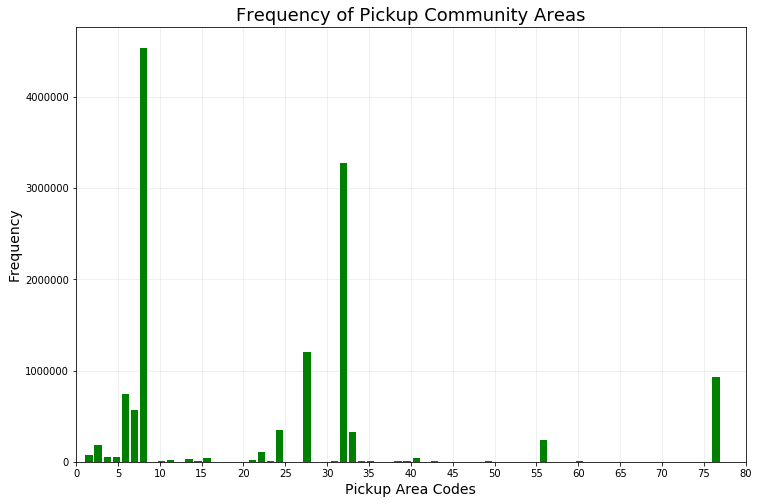

In [17]:
xrange = list(np.arange(0, 85, 5 ))
# print(xrange)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))

cleaned_2016["pickup_community_area"].hist(ax=ax, bins=70, rwidth=0.8, color="green")
ax.set_xlabel("Pickup Area Codes", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Frequency of Pickup Community Areas", fontsize=18)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xticks(xrange)
ax.set_xlim(0, 80)
fig.subplots_adjust(hspace=.5)


In [18]:
oldest_indices = cleaned_2016.groupby(["pickup_community_area"])["per_capita_income"].agg('idxmax')
print(oldest_indices)
dfOldest = cleaned_2016.loc[oldest_indices, ["pickup_community_area", "per_capita_income"]]
dfOldest

pickup_community_area
1.0        688
2.0        493
3.0        131
4.0        128
5.0        240
6.0          2
7.0         12
8.0          1
9.0      22294
10.0       582
11.0       136
12.0      4329
13.0      1125
14.0       439
15.0       323
16.0       489
17.0       645
18.0       393
19.0     18706
20.0       570
21.0       934
22.0        27
23.0       284
24.0         0
25.0        86
26.0      5295
27.0      8473
28.0         3
29.0      2991
30.0      1486
         ...  
48.0      8424
49.0       910
50.0     17620
51.0      5367
52.0     13785
53.0     67624
54.0     63031
55.0    169293
56.0         4
57.0       234
58.0       919
59.0      7902
60.0       129
61.0      4963
62.0     15742
63.0      1558
64.0      2574
65.0     12984
66.0     22647
67.0     26277
68.0      8387
69.0       107
70.0     30335
71.0      1118
72.0     47608
73.0     11989
74.0    246497
75.0     55126
76.0         7
77.0       118
Name: per_capita_income, Length: 77, dtype: object


,pickup_community_area,per_capita_income
688,1.0,23939.0
493,2.0,23040.0
131,3.0,35787.0
128,4.0,37524.0
240,5.0,57123.0
2,6.0,60058.0
12,7.0,71551.0
1,8.0,88669.0
22294,9.0,40959.0
582,10.0,32875.0


In [19]:
cleaned_2016.groupby(['tips','payment_type', 'per_capita_income']).size().unstack()
# cleaned_2016.groupby(['tips']).size().sort_values(ascending=False)
# cleaned_2016.groupby(['tips','per_capita_income']).size().unstack()
# cleaned_2016.groupby(['tips','pickup_community_area']).size().unstack()



per_capita_income    8201.0   10402.0  10432.0  10934.0  11317.0  11888.0  \
tips   payment_type                                                         
0.00   Cash             19.0   1462.0    383.0    373.0    384.0    689.0   
       Credit Card       2.0     51.0     13.0     23.0     17.0     36.0   
       Dispute           NaN      NaN      NaN      NaN      1.0      NaN   
       No Charge         NaN     11.0      NaN      1.0      2.0      5.0   
       Pcard             NaN      1.0      NaN      NaN      NaN      NaN   
       Prcard            NaN      6.0      NaN      1.0      NaN      1.0   
       Unknown           NaN     34.0     72.0      NaN     46.0     42.0   
0.01   Credit Card       NaN      2.0      1.0      NaN      1.0      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.02   Credit Card       NaN      NaN      1.0      NaN      NaN      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.03   Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.04   Credit Card       NaN      NaN      NaN      NaN      1.0      NaN   
0.05   Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.06   Credit Card       NaN      NaN      NaN      NaN      NaN      1.0   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.07   Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
       Prcard            NaN      NaN      NaN      NaN      NaN      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.08   Credit Card       NaN      NaN      NaN      1.0      NaN      1.0   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.09   Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.10   Cash              NaN      NaN      NaN      NaN      NaN      NaN   
       Credit Card       NaN      1.0      NaN      NaN      NaN      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
0.11   Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
       Unknown           NaN      NaN      NaN      NaN      NaN      NaN   
...                      ...      ...      ...      ...      ...      ...   
101.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
110.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
110.25 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
111.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
112.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
116.75 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
120.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
120.12 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
139.25 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
147.25 Cash              NaN      NaN      NaN      NaN      NaN      NaN   
147.85 Cash              NaN      NaN      NaN      NaN      NaN      NaN   
148.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
150.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
162.75 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
180.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
195.75 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
200.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
204.00 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN   
212.50 Credit Card       NaN      NaN      NaN      NaN      NaN      NaN

In [20]:
cleaned_2016.groupby(['tips','payment_type']).size().unstack().sum()

payment_type
Cash           6907995.0
Credit Card    5922724.0
Dispute           8438.0
No Charge        58262.0
Pcard             2586.0
Prcard            2947.0
Unknown          16170.0
dtype: float64

In [21]:
cleaned_2016.groupby(['tips','payment_type']).size().unstack().max()

payment_type
Cash           6902703.0
Credit Card    1875092.0
Dispute           8436.0
No Charge        58262.0
Pcard             2268.0
Prcard            2717.0
Unknown          12717.0
dtype: float64

In [22]:
from pymining import itemmining
transactions = (('a', 'b', 'c'), ('b'), ('a'), ('a', 'c', 'd'), ('b', 'c'), ('b', 'c'))
relim_input = itemmining.get_relim_input(transactions)
report = itemmining.relim(relim_input, min_support=2)
report
{frozenset(['c']): 4,
frozenset(['c', 'b']): 3,
frozenset(['a', 'c']): 2,
frozenset(['b']): 4,
frozenset(['a']): 3}

{frozenset({'c'}): 4,
 frozenset({'b', 'c'}): 3,
 frozenset({'a', 'c'}): 2,
 frozenset({'b'}): 4,
 frozenset({'a'}): 3}

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
corr_income_pickup = cleaned_2016['pickup_community_area'].corr(cleaned_2016['per_capita_income'])
print("Correlation Coefficient Between pickup_community_area & per_capita_income: {:.4f}".format(corr_income_pickup))

cosine_income_pickup = cosine_similarity(cleaned_2016['per_capita_income'], cleaned_2016['pickup_community_area'])
print("Null-invariant Cosine Coefficient Between pickup_community_area & per_capita_income: ",cosine_income_pickup)